# Comparing TPM diversity on Resnet20 vs Fitnet4

Hi , see below the comparision of the TPM diversity between the two case studies.<br>
The TPM were calculated between iters 25k-55k when both nets gives a sharp decline in loss , yeilding the majority of the training performance. 

Showing below blue curve is Fitnet4, green curve in Resnet20

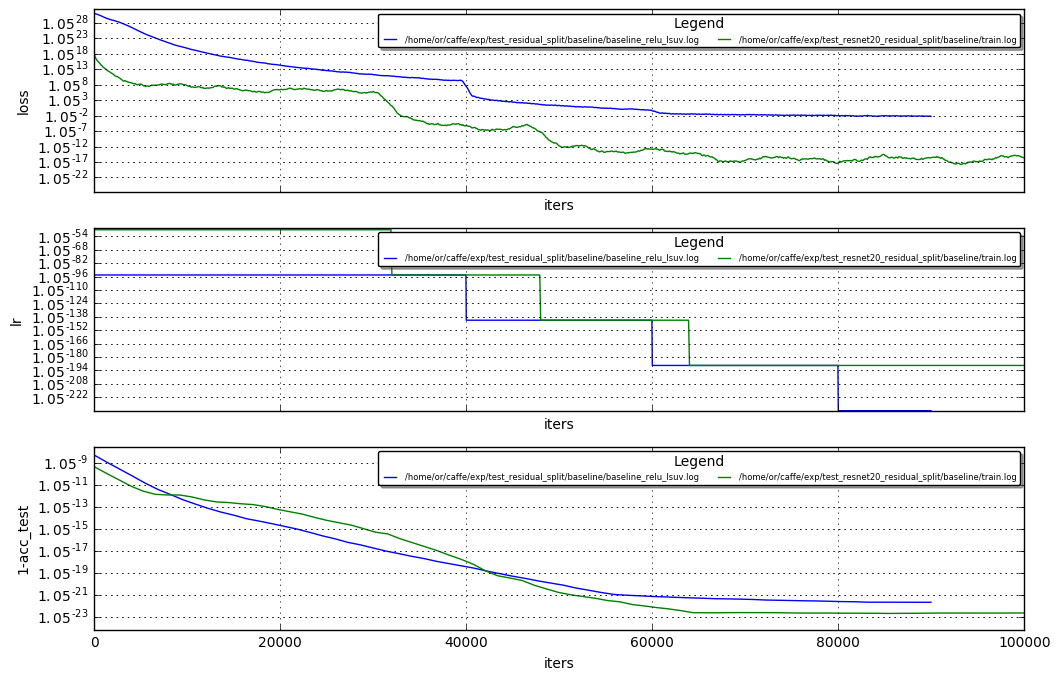

In [3]:
%run ~/caffe/utils/plot_loss.py ~/caffe/exp/test_residual_split/baseline/baseline_relu_lsuv.log \
                                /home/or/caffe/exp/test_resnet20_residual_split/baseline/train.log  --no_refresh

### Fitnet4 TPM per kernel

In [5]:
! cat /home/or/caffe/exp/test_residual_split/baseline/path.log | grep -A 99999 "with mean"

(2, 'conv1_1') with mean 0.540726191178
# NumSamples = 32; Min = 0.32; Max = 0.90
# each ∎ represents a count of 1
     0.3156 -     0.3737 [     1]: ∎ (3.12%)
     0.3737 -     0.4318 [     4]: ∎∎∎∎ (12.50%)
     0.4318 -     0.4899 [     8]: ∎∎∎∎∎∎∎∎ (25.00%)
     0.4899 -     0.5480 [     6]: ∎∎∎∎∎∎ (18.75%)
     0.5480 -     0.6061 [     5]: ∎∎∎∎∎ (15.62%)
     0.6061 -     0.6642 [     3]: ∎∎∎ (9.38%)
     0.6642 -     0.7223 [     0]:  (0.00%)
     0.7223 -     0.7804 [     4]: ∎∎∎∎ (12.50%)
     0.7804 -     0.8385 [     0]:  (0.00%)
     0.8385 -     0.8966 [     1]: ∎ (3.12%)
ratio entropy 2.13394146356
(4, 'conv1_2') with mean 0.572194506613
# NumSamples = 32; Min = 0.50; Max = 0.69
# each ∎ represents a count of 1
     0.5002 -     0.5191 [     4]: ∎∎∎∎ (12.50%)
     0.5191 -     0.5380 [     3]: ∎∎∎ (9.38%)
     0.5380 -     0.5570 [     3]: ∎∎∎ (9.38%)
     0.5570 -     0.5759 [     6]: ∎∎∎∎∎∎ (18.75%)
     0.5759 -     0.5948 [     7]: ∎∎∎∎∎∎∎ (21.88%)
     0.5948 -     0

### Resnet4 TPM per kernel

In [6]:
! cat /home/or/caffe/exp/test_resnet20_residual_split/baseline/path.log | grep -A 99999 "with mean"

(1, 'first_conv') with mean 0.53470375605
# NumSamples = 16; Min = 0.43; Max = 0.62
# each ∎ represents a count of 1
     0.4315 -     0.4508 [     1]: ∎ (6.25%)
     0.4508 -     0.4702 [     1]: ∎ (6.25%)
     0.4702 -     0.4895 [     1]: ∎ (6.25%)
     0.4895 -     0.5088 [     2]: ∎∎ (12.50%)
     0.5088 -     0.5281 [     2]: ∎∎ (12.50%)
     0.5281 -     0.5474 [     3]: ∎∎∎ (18.75%)
     0.5474 -     0.5668 [     1]: ∎ (6.25%)
     0.5668 -     0.5861 [     2]: ∎∎ (12.50%)
     0.5861 -     0.6054 [     1]: ∎ (6.25%)
     0.6054 -     0.6247 [     2]: ∎∎ (12.50%)
ratio entropy 1.40139264661
(2, 'first_conv_bn') with mean 0.288701445674
# NumSamples = 16; Min = 0.00; Max = 1.00
# each ∎ represents a count of 1
     0.0041 -     0.1037 [     6]: ∎∎∎∎∎∎ (37.50%)
     0.1037 -     0.2033 [     2]: ∎∎ (12.50%)
     0.2033 -     0.3029 [     3]: ∎∎∎ (18.75%)
     0.3029 -     0.4025 [     1]: ∎ (6.25%)
     0.4025 -     0.5021 [     1]: ∎ (6.25%)
     0.5021 -     0.6017 [     0]:  (

### Resnet20 <-> Fitnet4 Comparision Overview

Calculating the Mean (accross all conv layers) TPM entropy (the entropy induced by the TPM histogram per layer):
- Resnet20 Mean TPM entropy = 0.8627
- Fitnet4  Mean TPM entrioy = 0.927

###### See below : LEGEND ("layer_name" ,"num_of_output_channels")   "entropy_of_TPM_in_layer"

In [18]:
! paste -d "\t\t\t" resnet20_mean_tpm.log fitnet4_mean_tpm.log | column -t 

_                        ___Resnet20___  _               _                       ___Fitnet4___  _
Mean_TPM_ratio_entropy   =               0.86277205943   Mean_TPM_ratio_entropy  =              0.927628757083
('group1_block0_proj',   32)             1.49473467158   ('conv1_1',             32)            2.13394146356
('first_conv',           16)             1.40139264661   ('conv2_1',             80)            1.35458247054
('group0_block1_conv1',  16)             1.06095815044   ('conv1_2',             32)            1.10477602787
('group2_block0_proj',   64)             1.05356583732   ('conv1_3',             32)            1.09114722758
('group0_block0_conv0',  16)             1.03370054985   ('conv1_4',             48)            0.982281505484
('group0_block2_conv1',  16)             0.974314752869  ('conv2_2',             80)            0.94909725622
('group0_block1_conv0',  16)             0.881532261188  ('conv3_5',             128)           0.872748678436
('group1_block2_con

In resnet20 typiclly we find less diversity among the conv layers kernels TPM.<br>
Empirically the best candidante for a split is with great TPM diversity + a lot of output channels.<br>
resnet conv layers typically have less output channels